# Introduction

Here are the ruins of our first attempt of project. In this situation, we wanted to study the sentiment linked to the day of week. However, as it can be seen in this notebook, the effect on the day is quite negligible on the sentiment. Before losing to much time on this lost cause, we decided to take on another adventure : see the notebook `proof_of_concept.ipynb`.


# Different imports and setup

In [9]:
# Different libraries import
import pandas as pd

### Functions

Here, we import the whole file `functions.py` as it is our inventory of functions. In the notebook, we focus on the presentation of results.

In [2]:
from functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Extend dataset

In [3]:
# Set to True to perform the dataset expansion and to set the files

extend = False

In [4]:
# To add the weekday to every quote of the dataset.
# We create a new dataset to not alter the original in case of problems

if extend:
  years = [2015, 2016, 2017, 2018, 2019, 2020]

  for year in tqdm(years):
    path_to_file = f'quotes-{year}.json.bz2' 
    path_out = f'days_quotes-{year}.json.bz2'
    save_df_with_day(path_to_file, path_out)

In [5]:
# To add the sentiment to every quote of the dataset.

if extend:
  for year in tqdm(years):
    path_to_file = f'day_quotes-{year}.json.bz2' 
    save_df_with_sentiment(path_to_file)

### Importing test df

We do a test on the 2016 data set. In order to ease the analysis process, we reduce the size of the file to N rows (here we decide 200000).

In [6]:
filename = 'quotes-2016_days_sentiment.json.bz2' 
df = create_frame(filename, 200000)

## Weekday stats

We use the function `weekdays_stats` on the data frame to realise the sentimental analysis on the 200000 quotes. The output is a number between -1 and 1. The closer the compound is to -1, the more negative is the sentiment linked to it, and vice versa for a result of 1. When the compound is 0, it means that the quote has been evaluated as neutral.

Many sentimental analyses gave a neutral result, so for each day we calculate the mean of the compounds, then we do the same operation but with the removal of neutral results. We can see that the proportions of positives and negatives is in favor of positives. These proportions do not vary much according to the date, even though there is a slight more negative sentiment on Mondays.

In [7]:
weekdays_stats(df)

Monday :
Proportion of positives:  0.6948174768299603
Proportion of negatives:  0.30518252317003974
Mean of the compounds : 0.1863500445680465
Mean of the compounds without the neutral results : 0.247142032343484
Tuesday :
Proportion of positives:  0.6989080802064721
Proportion of negatives:  0.3010919197935279
Mean of the compounds : 0.19068512591972245
Mean of the compounds without the neutral results : 0.25314141353980546
Wednesday :
Proportion of positives:  0.7023599724159069
Proportion of negatives:  0.2976400275840932
Mean of the compounds : 0.19293239465212728
Mean of the compounds without the neutral results : 0.2548656003371389
Thursday :
Proportion of positives:  0.701571281110219
Proportion of negatives:  0.29842871888978095
Mean of the compounds : 0.19255351817267632
Mean of the compounds without the neutral results : 0.2562153610888099
Friday :
Proportion of positives:  0.7012130491108233
Proportion of negatives:  0.2987869508891768
Mean of the compounds : 0.1932413897191

## Plot distributions

### Weekdays

Here, the final attempts on vizualisation on the feasibility of this project are proposed. The goal of this function is to plot the number of quotes related to their respective sentimental score, and this multiplied by 7 for each day of the week. 

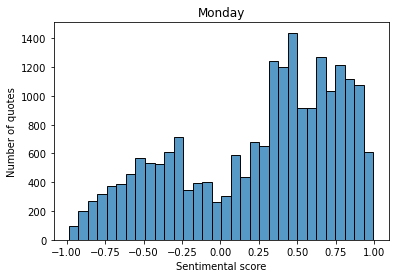

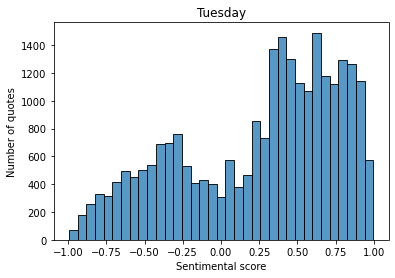

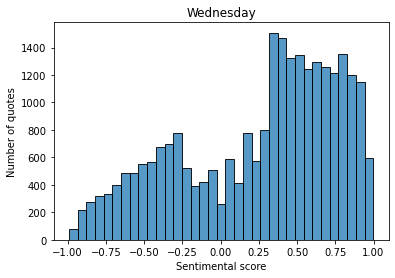

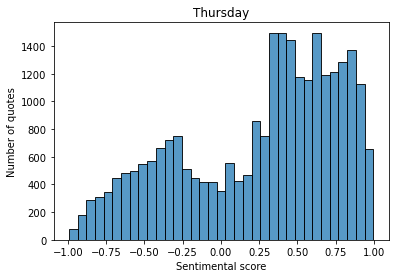

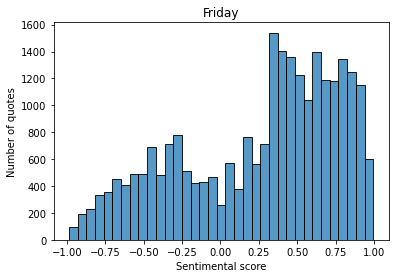

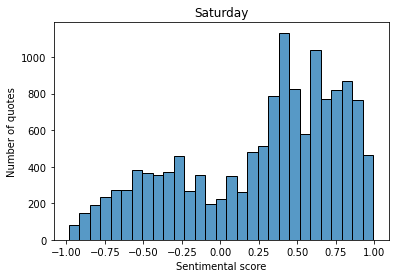

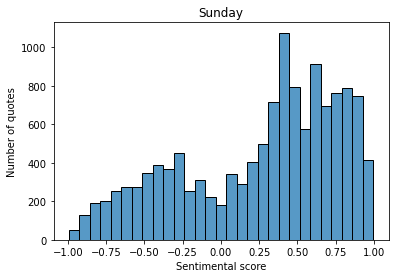

In [10]:
weekdays_sent_plot(df)

We were very surprised by the similarity between the `histplots` ! This clearly convinced us to try something else. Moreover, in previous attempts, we have seen that the number of neutral results is very high and the results of the graphs above might not be as representative as we expected. We could infer from intuition that the imbalance between negatives and positives comes from the fact that we are more inclined to talk in the active voice. Finally, as a symbolic interpretation, we see that the number of quotes for the weekend is lower (max at around 1050 quotes) than for other days of the week (max at around 1400 for Mondays to Thursdays) and especially Friday(around 1600 quotes), which is arguably the busiest day of the week.